In [ ]:
Categoría (Conv 833 de Colciencias 2018 #2019

In [1]:
import pandas as pd
import numpy as np
import json
import plotly.express as px
from ipywidgets import interact
from custom_plots import plot_categories
import plotly.graph_objects as go

# Grupos de investigación

## Input database
Crear un Dataframe a partir de las diferetes hojas del arcivo excel original.

In [2]:
filenames = ['../databases/FIA.csv', '../databases/FA.csv', '../databases/FCEN.csv']

df = pd.concat([pd.read_csv(f) for f in filenames])
for col in df.columns:
    df[col] = df[col].fillna(method='ffill')
    
df.head()

,Código Hermes,Código Colciencias,Nombre del grupo,Lider colciencias,Lider Hermes,Integrantes Hermes,Integrantes Colciencias,Categoría (Conv 693 de Colciencias 2014),Categoría (Conv 737 de Colciencias 2015),Categoría (Conv 781 de Colciencias 2017),...,Area_OCDE,Agenda del Conocimiento,Sede,Facultad,Departamento,Correo,Sedes_Int,Lider Colciencias,Categoría (Conv 737 de Colciencias 2015),Categoría (Conv 833 de Colciencias 2019)
0,615.0,COL0007909,CONTROL Y PROCESAMIENTO DIGITAL DE SEÑALES,CASTELLANOS DOMINGUEZ CESAR GERMAN,CASTELLANOS DOMINGUEZ CESAR GERMAN,ALBERTO SEPULVEDA GIRALDO,https://scienti.minciencias.gov.co/gruplac/jsp...,A1,A1,A1,...,Ingeniería y Tecnología,Tecnologías de la Información y Comunicaciones,MANIZALES,4- FACULTAD DE INGENIERÍA Y ARQUITECTURA,"4- DEPARTAMENTO DE INGENIERÍA ELÉCTRICA, ELECT...",cgcastellanosd@unal.edu.co,"Bogotá, Manizales.",NaN,NaN,NaN
1,615.0,COL0007909,CONTROL Y PROCESAMIENTO DIGITAL DE SEÑALES,CASTELLANOS DOMINGUEZ CESAR GERMAN,CASTELLANOS DOMINGUEZ CESAR GERMAN,ALEJANDRO GIRALDO ORTIZ,https://scienti.minciencias.gov.co/gruplac/jsp...,A1,A1,A1,...,Ingeniería y Tecnología,Tecnologías de la Información y Comunicaciones,MANIZALES,4- FACULTAD DE INGENIERÍA Y ARQUITECTURA,"4- DEPARTAMENTO DE INGENIERÍA ELÉCTRICA, ELECT...",cgcastellanosd@unal.edu.co,"Bogotá, Manizales.",NaN,NaN,NaN
2,615.0,COL0007909,CONTROL Y PROCESAMIENTO DIGITAL DE SEÑALES,CASTELLANOS DOMINGUEZ CESAR GERMAN,CASTELLANOS DOMINGUEZ CESAR GERMAN,ANDERSON ALBERTO RUALES TORRES,https://scienti.minciencias.gov.co/gruplac/jsp...,A1,A1,A1,...,Ingeniería y Tecnología,Tecnologías de la Información y Comunicaciones,MANIZALES,4- FACULTAD DE INGENIERÍA Y ARQUITECTURA,"4- DEPARTAMENTO DE INGENIERÍA ELÉCTRICA, ELECT...",cgcastellanosd@unal.edu.co,"Bogotá, Manizales.",NaN,NaN,NaN
3,615.0,COL0007909,CONTROL Y PROCESAMIENTO DIGITAL DE SEÑALES,CASTELLANOS DOMINGUEZ CESAR GERMAN,CASTELLANOS DOMINGUEZ CESAR GERMAN,ANDRES DAVID TOBAR RODRIGUEZ,https://scienti.minciencias.gov.co/gruplac/jsp...,A1,A1,A1,...,Ingeniería y Tecnología,Tecnologías de la Información y Comunicaciones,MANIZALES,4- FACULTAD DE INGENIERÍA Y ARQUITECTURA,"4- DEPARTAMENTO DE INGENIERÍA ELÉCTRICA, ELECT...",cgcastellanosd@unal.edu.co,"Bogotá, Manizales.",NaN,NaN,NaN
4,615.0,COL0007909,CONTROL Y PROCESAMIENTO DIGITAL DE SEÑALES,CASTELLANOS DOMINGUEZ CESAR GERMAN,CASTELLANOS DOMINGUEZ CESAR GERMAN,ANDRES EDUARDO CASTRO OSPINA,https://scienti.minciencias.gov.co/gruplac/jsp...,A1,A1,A1,...,Ingeniería y Tecnología,Tecnologías de la Información y Comunicaciones,MANIZALES,4- FACULTAD DE INGENIERÍA Y ARQUITECTURA,"4- DEPARTAMENTO DE INGENIERÍA ELÉCTRICA, ELECT...",cgcastellanosd@unal.edu.co,"Bogotá, Manizales.",NaN,NaN,NaN


In [3]:
df.columns

Index(['Código Hermes', 'Código Colciencias', 'Nombre del grupo',
       'Lider colciencias', 'Lider Hermes', 'Integrantes Hermes',
       'Integrantes Colciencias', 'Categoría (Conv 693 de Colciencias 2014)',
       'Categoría (Conv 737 de Colciencias 2015)',
       'Categoría (Conv 781 de Colciencias 2017)',
       'Categoría (Conv 833 de Colciencias 2018)',
       'Categoría (Conv 894 de Colciencias 2021)', 'Año de conformación',
       'Mes ', 'Lineas de Investigación', 'Area_Conocimiento_OCDE',
       'Area_OCDE', 'Agenda del Conocimiento', 'Sede', 'Facultad',
       'Departamento', 'Correo', 'Sedes_Int', 'Lider Colciencias',
       'Categoría (Conv 737 de Colciencias 2015) ',
       'Categoría (Conv 833 de Colciencias 2019)'],
      dtype='object')

## Getters

Funciones básicas de consulta que reciven como entrada el nombre del grupo. 

In [109]:
get_name = lambda df,g:df[df['Nombre del grupo'] == g]['Nombre del grupo'].tolist()[0]
get_members = lambda df,g:df[df['Nombre del grupo'] == g]
# get_line = lambda df,g:df[df['Nombre del grupo'] == g]['Lineas de Investigación'].tolist()[0]
get_sub_OCDE = lambda df,g:df[df['Nombre del grupo'] == g]['Area_Conocimiento_OCDE'].tolist()[0]
get_OCDE = lambda df,g:df[df['Nombre del grupo'] == g]['Area_OCDE'].tolist()[0]
get_know = lambda df,g:df[df['Nombre del grupo'] == g]['Agenda del Conocimiento'].tolist()[0]
get_facultad = lambda df,g:df[df['Nombre del grupo'] == g]['Facultad'].tolist()[0]
get_departamento = lambda df,g:df[df['Nombre del grupo'] == g]['Departamento'].tolist()[0]
get_categoria = lambda df,g:df[df['Nombre del grupo'] == g]['Categoría (Conv 781 de Colciencias 2017)'].tolist()[0]
get_lider = lambda df,g:df[df['Nombre del grupo'] == g]['Lider colciencias'].tolist()[0]

## Limpiar base de datos

El identificador de cada grupo es el mismo nombre del grupo.  
La base de datos ```groups``` contiene la información ordenada por grupo de investigación.

In [110]:
ids = np.unique(df['Nombre del grupo'].tolist())

In [112]:
'hola mundo'.title()

'Hola Mundo'

In [113]:
groups = {}
for group in ids:
    groups.setdefault('members', []).append(len(get_members(df, group)))
    groups.setdefault('name', []).append(get_name(df, group).capitalize())
    # groups.setdefault('line', []).append(get_line(df, group).capitalize())
    groups.setdefault('sub_ocde', []).append(get_sub_OCDE(df, group).capitalize())
    groups.setdefault('ocde', []).append(get_OCDE(df, group).capitalize())
    groups.setdefault('knowledge', []).append(get_know(df, group).capitalize())
    groups.setdefault('facultad', []).append(get_facultad(df, group).replace('4- ', '').capitalize())
    groups.setdefault('departamento', []).append(get_departamento(df, group).replace('4- ', '').capitalize())
    groups.setdefault('categoria', []).append(get_categoria(df, group).capitalize())
    groups.setdefault('lider', []).append(get_lider(df, group).title())

groups = pd.DataFrame.from_dict(groups)
groups['knowledge'].replace('Cyt de minerales y materiales', 'Ciencia y tecnología de minerales y materiales', inplace=True)
# groups['facultad'].replace('4- ', '', inplace=True)
groups.head()

,members,name,sub_ocde,ocde,knowledge,facultad,departamento,categoria,lider
0,11,Abc dynamics,Ingeniería civil,Ingeniería y tecnología,Desarrollo organizacional económico e industrial,Facultad de ciencias exactas y naturales,Departamento de matemáticas,A,Luis Ricardo Vasquez Varela
1,13,Analisis matematico am,Ingeniería civil,Metemáticas,Desarrollo organizacional económico e industrial,Facultad de ciencias exactas y naturales,Departamento de matemáticas,A,Luis Ricardo Vasquez Varela
2,4,Arquitectura medio ambiente y sostenibilidad,Ciencias de la tierra y medioambientales,Ciencias naturales,Ambiente y biodiversidad,Facultad de ingeniería y arquitectura,Escuela de arquitectura y urbanismo,C,Agredo Cardona Gustavo Adolfo
3,1,Arquitectura y ciudad: ciencia y cultura,Humanidades,Arte,Arte y cultura,Facultad de ingeniería y arquitectura,Escuela de arquitectura y urbanismo,C,Ocampo Hurtado Juan Gabriel
4,1,"Arquitectura, ciudad y territorio",Humanidades,Arte,Arte y cultura,Facultad de ingeniería y arquitectura,Escuela de arquitectura y urbanismo,C,Llanos Chaparro Isabel


Información general que involucra a todos los grupos

In [6]:
data = {
    'grupos': np.unique(df['Nombre del grupo'].tolist()).tolist(),
    'facultades': np.unique(groups['facultad'].tolist()).tolist(),
    'departamentos': np.unique(groups['departamento'].tolist()).tolist(),
    'Sedes de intervención': list(set([sede.strip(' ,.') for sede in ','.join(np.unique(df['Sedes_Int']).tolist()).split(',')])),
}

# Visualizations

## Facultades

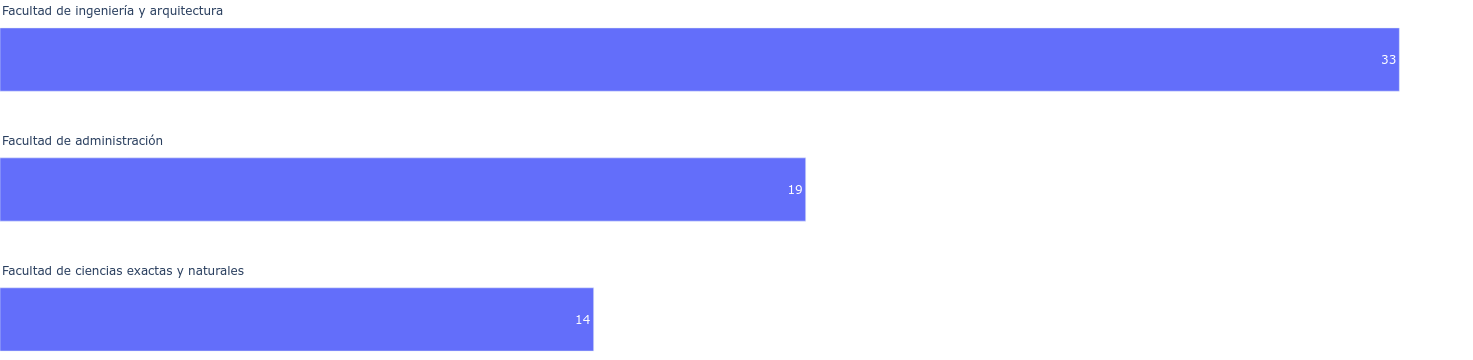

In [11]:
names = groups['facultad'].value_counts(dropna=False).keys().tolist()
counts = groups['facultad'].value_counts(dropna=False).tolist()
categories = [{'name': name, 'value': count} for name, count in zip(names, counts)]
plot_categories(categories, height=200)

## Áreas de conocimiento

In [7]:
@interact(faculty=(['All'] + data['facultades']))
def _(faculty='All'):

    config = {
        'labels': {'ocde': 'Area',
                   'sub_ocde': 'Subárea',
                   'count': ''
                  },
         'height': 500,
         # 'title':'Áreas del Conocimiento - OCDE',
         'template': 'plotly_white',
    }

    g = groups.loc[groups['facultad'] == faculty]
    if faculty == 'All':
        fig = px.histogram(groups, y='sub_ocde', color='ocde', orientation='h', barmode='stack',  **config)

    elif faculty in ['Facultad de administración', 'Facultad de ciencias exactas y naturales']:
        config['labels']['ocde'] = ''
        fig = px.histogram(g, y='ocde', orientation='h', barmode='stack',  **config)
    else:
        fig = px.histogram(g, y='sub_ocde', color='ocde', orientation='h', barmode='stack',  **config)

    fig.update_layout(xaxis_title='Grupos de investigación')
    fig.show()

interactive(children=(Dropdown(description='faculty', options=('All', 'Facultad de administración', 'Facultad …

## Agenda de conocimiento

In [8]:
@interact(faculty=(['All'] + data['facultades']))
def _(faculty='All'):    

    if faculty != 'All':
        g = groups.loc[groups['facultad'] == faculty]
    else:
        g = groups

    names = g['knowledge'].value_counts(dropna=False).keys().tolist()
    counts = g['knowledge'].value_counts(dropna=False).tolist()
    categories = [{'name': name, 'value': count} for name, count in zip(names, counts)]

    s = plot_categories(categories, align='right', height=700)
    s.update_layout(xaxis_title='Grupos de investigación')
    return s

interactive(children=(Dropdown(description='faculty', options=('All', 'Facultad de administración', 'Facultad …

## Categorías de grupos de investigación

In [63]:
@interact(faculty=(['All'] + data['facultades']))
def _(faculty='All'):  

    if faculty != 'All':
        g = groups.loc[groups['facultad'] == faculty]
    else:
        g = groups


    labels = g['categoria'].value_counts().keys()
    values = g['categoria'].value_counts().to_list()

    fig = go.Figure(data=[go.Pie(labels=labels, values=values, textinfo='label+value', hole=.3)])
    fig.update_traces(hoverinfo='none', hovertemplate='')
    fig.update(layout_showlegend=False)

    fig.show()

interactive(children=(Dropdown(description='faculty', options=('All', 'Facultad de administración', 'Facultad …

## Grupo de investigación 

In [103]:
@interact(name=groups['name'].to_list())
def _(name):  
    
    g = groups.loc[groups['name'] == name]
    grupo = g.to_dict('records')[0]
    
    
    for k in grupo:
        print(f'{k}:\t\t{str(grupo[k]).strip()}')


interactive(children=(Dropdown(description='name', options=('Abc dynamics', 'Analisis matematico am', 'Arquite…